코로나19에 대한 나라별 데이터로 모델링 진행

2-1 마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라
상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라

In [21]:
import pandas as pd
import numpy as np
data=pd.read_csv("problem2.csv")

- location : 지역명
- date : 일자
- total_cases : 누적 확인자
- total_deaths : 누적 사망자
- new_tests : 검사자
- population : 인구
- new_vaccinations : 백신 접종자

In [22]:
# 인구 대비 확진자 비율
data['ratio']=data['total_cases']/data['population']

In [23]:
data['date']=pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136931 entries, 0 to 136930
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   location          136931 non-null  object        
 1   date              136931 non-null  datetime64[ns]
 2   total_cases       129343 non-null  float64       
 3   total_deaths      118074 non-null  float64       
 4   new_tests         57061 non-null   float64       
 5   population        135951 non-null  float64       
 6   new_vaccinations  29414 non-null   float64       
 7   ratio             128680 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 8.4+ MB


In [24]:
data.isna().sum()

location                 0
date                     0
total_cases           7588
total_deaths         18857
new_tests            79870
population             980
new_vaccinations    107517
ratio                 8251
dtype: int64

In [28]:
new=data[data.new_vaccinations.isna()]
new

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,ratio
645,Afghanistan,2021-11-30,157289.0,7308.0,NaN,3.983543e+07,NaN,0.003948
1302,Africa,2021-11-30,8652562.0,222881.0,NaN,1.373486e+09,NaN,0.006300
1947,Albania,2021-11-30,199945.0,3096.0,NaN,2.872934e+06,NaN,0.069596
2592,Algeria,2021-11-30,210531.0,6071.0,NaN,4.461663e+07,NaN,0.004719
3231,Andorra,2021-11-30,17115.0,131.0,NaN,7.735400e+04,NaN,0.221256
...,...,...,...,...,...,...,...,...
134162,Vietnam,2021-11-30,1238082.0,25252.0,NaN,9.816883e+07,NaN,0.012612
135086,World,2021-11-30,262797494.0,5215291.0,NaN,7.874966e+09,NaN,0.033371
135686,Yemen,2021-11-30,10004.0,1950.0,NaN,3.049064e+07,NaN,0.000328
136309,Zambia,2021-11-30,210169.0,3667.0,NaN,1.892066e+07,NaN,0.011108


In [20]:
import matplotlib.pyplot as plt
data=data.fillna(0)
data=data[data['date']!='2021-11-30']
data.head(3)

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,ratio,new_cases,new_deaths,total_vaccinations,7days_new_case,ratio_index
0,Afghanistan,2020-02-24,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,5.0,0.0,0.0,0.0,0.0
1,Afghanistan,2020-02-25,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,2020-02-26,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,0.0,0.0,0.0,0.0,0.0


In [6]:
data=data[data['population']!=0]

In [14]:
import warnings
warnings.filterwarnings('ignore')

for location in data.location.unique():
    lo=data[data.location==location]
    
    #일일 확진자
    data.loc[lo.index, 'new_cases']=lo.total_cases.diff().values
    data.loc[lo.index[0], 'new_cases']=lo['total_cases'].values[0]
    
    #일일 사망자
    data.loc[lo.index, 'new_deaths']=lo.total_deaths.diff().values
    data.loc[lo.index[0], 'new_deaths']=lo['total_deaths'].values[0]
    
    #누적 백신 접종자
    data.loc[lo.index, 'total_vaccinations']=lo['new_vaccinations'].cumsum().values
    
    #일주일 검사자 합계
    data.loc[lo.index, '7days_new_case']=lo['new_tests'].rolling(7).sum().fillna(0).values

In [15]:
data[data['new_tests']!=0].head(10)

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,ratio,new_cases,new_deaths,total_vaccinations,7days_new_case,ratio_index
1303,Albania,2020-02-25,0.0,0.0,8.0,2872934.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1304,Albania,2020-02-26,0.0,0.0,5.0,2872934.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1305,Albania,2020-02-27,0.0,0.0,4.0,2872934.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1306,Albania,2020-02-28,0.0,0.0,1.0,2872934.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1307,Albania,2020-02-29,0.0,0.0,8.0,2872934.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1308,Albania,2020-03-01,0.0,0.0,3.0,2872934.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1309,Albania,2020-03-02,0.0,0.0,2.0,2872934.0,0.0,0.0,0.0,0.0,0.0,31.0,0.001079
1310,Albania,2020-03-03,0.0,0.0,5.0,2872934.0,0.0,0.0,0.0,0.0,0.0,28.0,0.000975
1311,Albania,2020-03-04,0.0,0.0,6.0,2872934.0,0.0,0.0,0.0,0.0,0.0,29.0,0.001009
1312,Albania,2020-03-05,0.0,0.0,8.0,2872934.0,0.0,0.0,0.0,0.0,0.0,33.0,0.001149


- plot

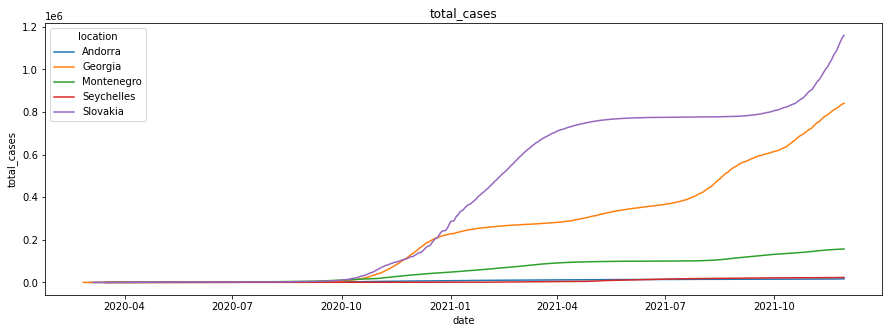

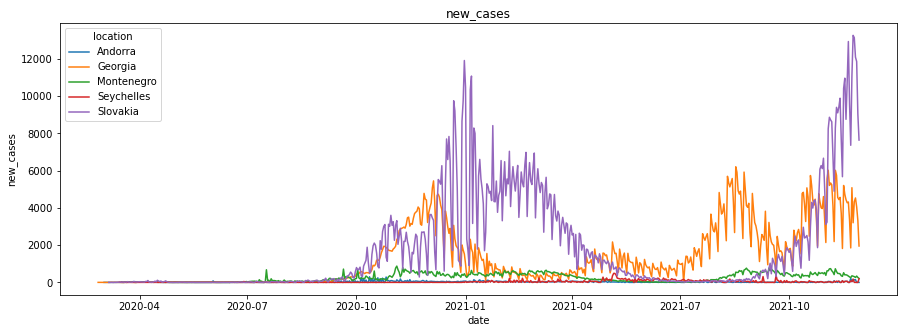

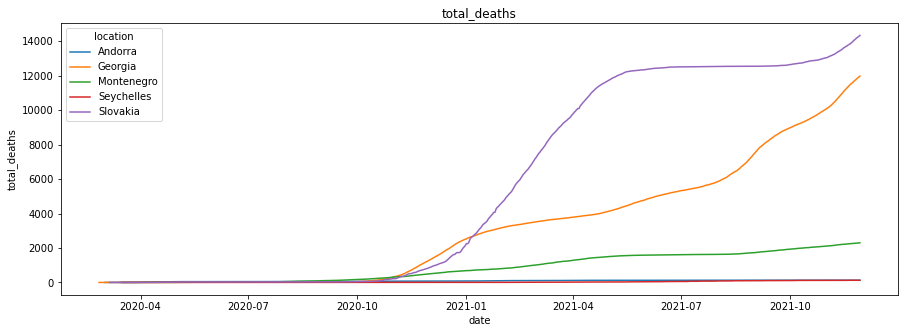

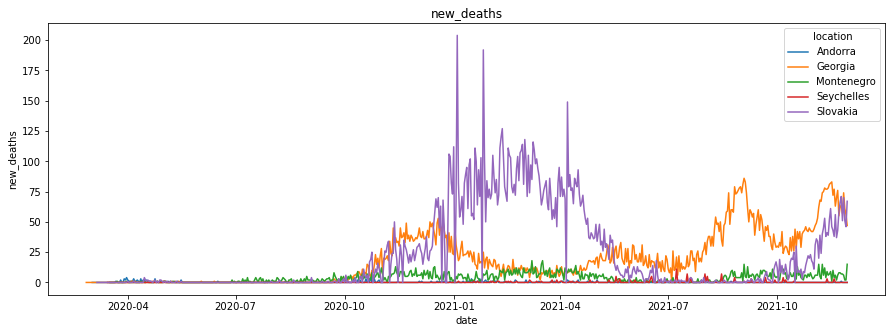

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

#나라별 마지막 행만 출력
#ratio(인구대비 확진자 비율) 순으로 정렬, 상위 5개 나라
locations=data.groupby(['location']).tail(1).sort_values('ratio', ascending=False).location.head(5).values
target=data[data.location.isin(locations)].reset_index(drop=True)

# 누적확진자, 신규확진자, 누적 사망자, 신규 사망자 plot
for v in ['total_cases', 'new_cases', 'total_deaths', 'new_deaths']:
    plt.figure(figsize=(15,5))
    plt.title(v)
    sns.lineplot(data=target, x='date', y=v, hue='location')
    plt.show()

2-2 코로나 위험지수를 직접 만들고 그 위험지수에 대한 설명을 적고 위험지수가 높은 국가들 10개를 선정해서 시각화

코로나 위험지수는 코로나로 인한 국가의 위기정도를 표현한다. 코로나 전파 특성상 최근 일주일의 확진자 숫자가 그다음의 일주일에 영향을 준다.     
일일 사망자수(new_death)는 현재 코로나의 국가 내에서의 치명율을 표현한다. 위기정도는 누적 백신인구에 의해 감소 될수 있다. 
* 국가간의 비교를 위해 각 국가의 인구수로 나눠주어 값을 스케일링하고, 변수간 보정상수를 통해 정수화를 유도한다


In [10]:
def ratio_index(x):
    value=(x['7days_new_case']/x['population']+x['new_deaths']/x['population']-x['total_vaccinations']/x['population']*0.001)*100
    return value

data['ratio_index']=data.apply(ratio_index, axis=1)

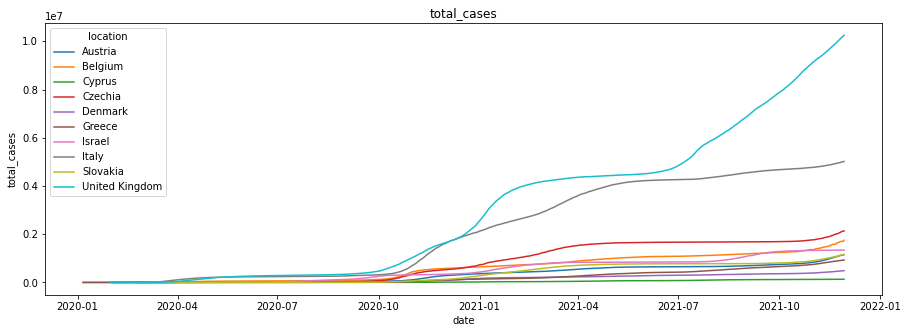

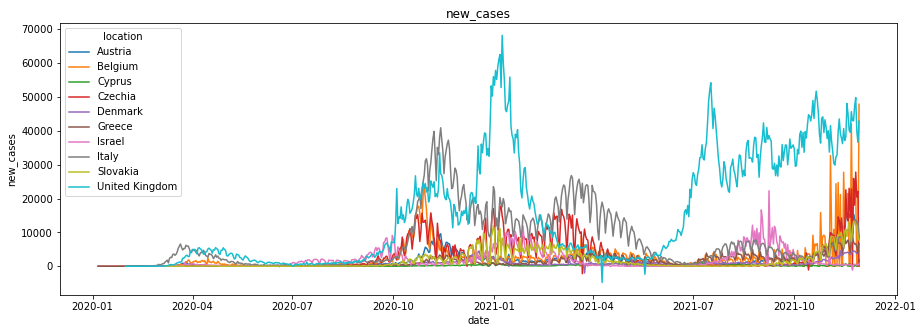

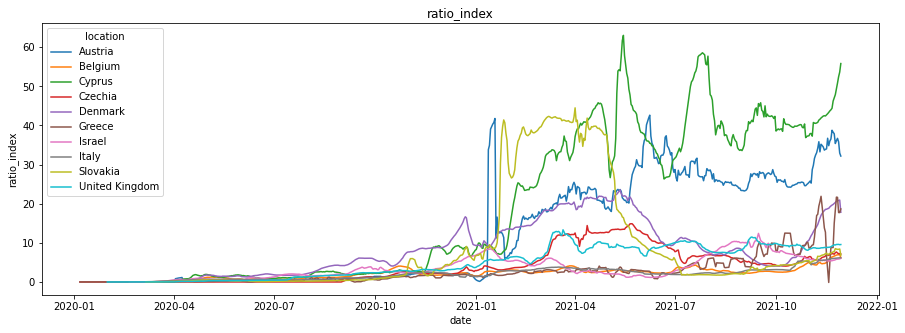

In [17]:
#나라별 마지막 행만 출력
#ratio(인구대비 확진자 비율) 순으로 정렬, 상위 10개 나라
locations=data.groupby(['location']).tail(1).sort_values('ratio_index', ascending=False).location.head(10).values
target=data[data.location.isin(locations)].reset_index(drop=True)

# 누적확진자, 신규확진자, 위험지수 plot
for v in ['total_cases', 'new_cases', 'ratio_index']:
    plt.figure(figsize=(15,5))
    plt.title(v)
    sns.lineplot(data=target, x='date', y=v, hue='location')
    plt.show()

2-3 한국의 코로나 신규 확진자 예측해라(선형 시계열모델 + 비선형시계열 각각 한개씩 만들어라)

In [19]:
ko=data[data['location']=='South Korea'].reset_index(drop=True)
ko.head(3)

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,ratio,new_cases,new_deaths,total_vaccinations,7days_new_case,ratio_index
0,South Korea,2020-01-21,0.0,0.0,0.0,51305184.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
1,South Korea,2020-01-22,1.0,0.0,5.0,51305184.0,0.0,1.949121e-08,1.0,0.0,0.0,0.0,0.0
2,South Korea,2020-01-23,1.0,0.0,0.0,51305184.0,0.0,1.949121e-08,0.0,0.0,0.0,0.0,0.0


                             ARIMA Model Results                              
Dep. Variable:            D.new_cases   No. Observations:                  678
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4422.667
Method:                       css-mle   S.D. of innovations            164.707
Date:                Mon, 12 Sep 2022   AIC                           8851.334
Time:                        13:56:33   BIC                           8864.892
Sample:                             1   HQIC                          8856.583
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4690      6.358      0.703      0.482      -7.993      16.931
ma.L1.D.new_cases     0.0052      0.061      0.084      0.933      -0.115       0.126
                        

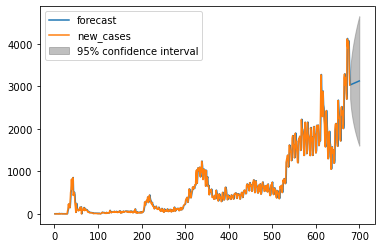

In [18]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(ko.new_cases, order=(0,1,1))
model_fit=model.fit(trend='c', full_output=True, disp=1)
print(model_fit.summary())

#679개행->700개 예측
fig=model_fit.plot_predict(1,700)